In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [3]:
df = pd.read_csv("../Python/Output/PowerError.txt", sep='\t')
df.head()

,X,Exp,VarDbl Error,VarDbl Uncertainty,Lib Error,Lib Uncertainty
0,0.1,-2.0,0.000000e+00,1.447135e-17,0.000000e+00,1.133117e-17
1,0.1,-1.9,2.775558e-17,1.490451e-17,2.775558e-17,1.133117e-17
2,0.1,-1.8,-1.387779e-17,1.434009e-17,-1.387779e-17,1.133117e-17
3,0.1,-1.7,0.000000e+00,1.468923e-17,0.000000e+00,1.133117e-17
4,0.1,-1.6,-1.387779e-17,1.529930e-17,-1.387779e-17,1.133117e-17


In [4]:
df['Normalized Error'] = df['VarDbl Error'] / df['VarDbl Uncertainty']
df.head()

,X,Exp,VarDbl Error,VarDbl Uncertainty,Lib Error,Lib Uncertainty,Normalized Error
0,0.1,-2.0,0.000000e+00,1.447135e-17,0.000000e+00,1.133117e-17,0.000000
1,0.1,-1.9,2.775558e-17,1.490451e-17,2.775558e-17,1.133117e-17,1.862227
2,0.1,-1.8,-1.387779e-17,1.434009e-17,-1.387779e-17,1.133117e-17,-0.967762
3,0.1,-1.7,0.000000e+00,1.468923e-17,0.000000e+00,1.133117e-17,0.000000
4,0.1,-1.6,-1.387779e-17,1.529930e-17,-1.387779e-17,1.133117e-17,-0.907086


In [5]:
print(df['Normalized Error'].std(), df['Normalized Error'].mean())

0.5576605864092136 0.030873442287802512


In [11]:
def PlotSurface(value='VarDbl Uncertainty', logz=False, cmap=None):
    dfOrderVsNoise = df.pivot(index='X', columns='Exp', values=value)
    sOrder = dfOrderVsNoise.columns.values
    sNoise = dfOrderVsNoise.index.values if logz else dfOrderVsNoise.index.values
    sX, sY = np.meshgrid(sOrder, sNoise)
    sZ = np.log10(dfOrderVsNoise.values) if logz else dfOrderVsNoise.values
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(30, -45) if logz else ax.view_init(30, 45)
    surf = ax.plot_surface( sX, sY, sZ, cmap=cmap if cmap else plt.cm.spring if logz else plt.cm.winter )
    cb = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.15)

    ax.set_xlabel('p')
    ax.set_ylabel('X')
    ax.set_title(f'{value}' + ' for $(x^p)^{1/p}$ - x')


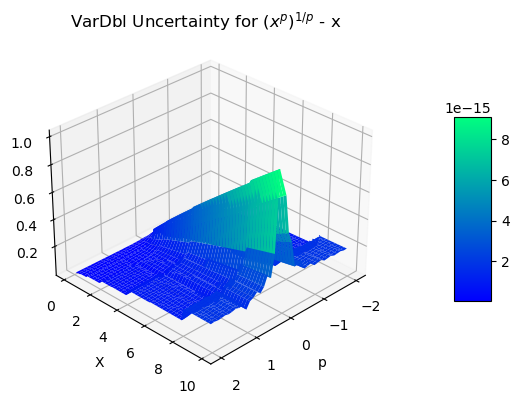

In [7]:
PlotSurface()

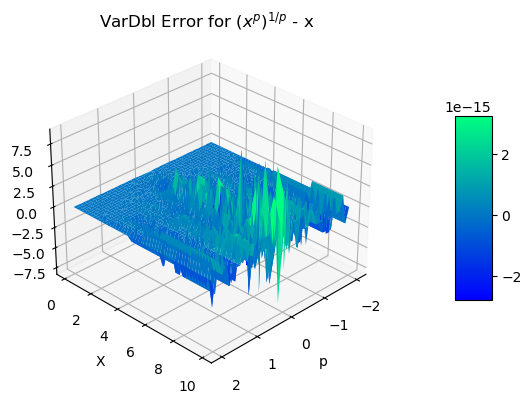

In [8]:
PlotSurface('VarDbl Error')

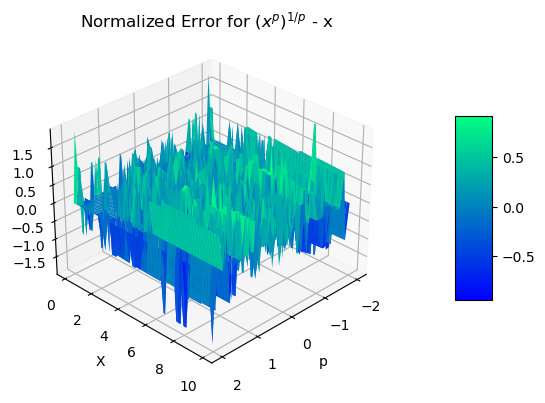

In [9]:
PlotSurface('Normalized Error')

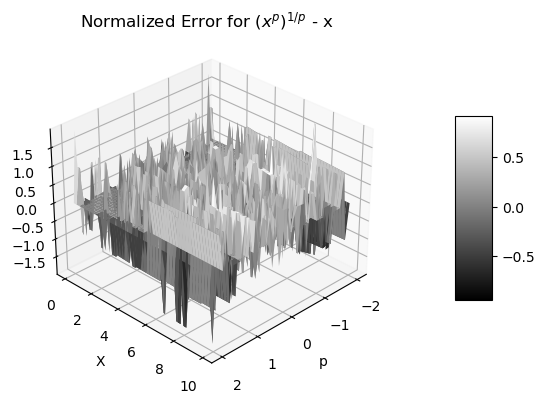

In [12]:
PlotSurface('Normalized Error', cmap=plt.cm.gray)

In [14]:
df['Normalized Error'].describe()

count    3960.000000
mean        0.030873
std         0.557661
min        -1.924649
25%         0.000000
50%         0.000000
75%         0.256272
max         1.914756
Name: Normalized Error, dtype: float64

array([[<AxesSubplot:title={'center':'Normalized Error'}>]], dtype=object)

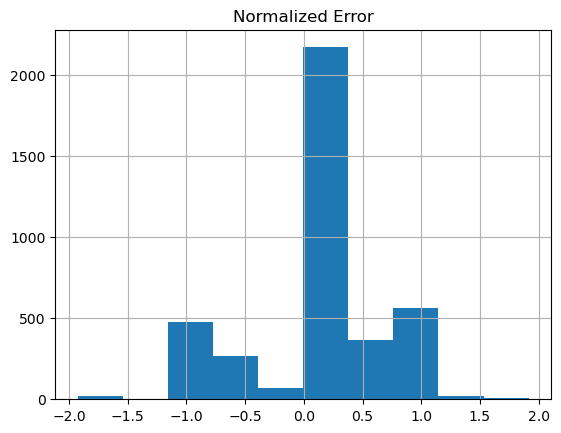

In [10]:
df.hist(column='Normalized Error')